# Reconocimiento de dígitos con KNN

Veamos como interactuar con las clases implementadas en el módulo de C++ haciendo una experimentación muy simplificada, y a modo de ejemplo, del método KNN para reconocer digitos

## Compilando el módulo desde C++

Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [1]:
!cd ../.. && mkdir build
!cd ../../build/ && rm -rf *
!cd ../../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/facutotaro/.virtualenvs/tp/bin/python (found version "3.8.10") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/facutotaro/machine/metnum_tp2
-- Configuring done
-- Gener

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version

import sys
import os

p = os.path.abspath('../')
sys.path.insert(1, p)

import metnum

/home/facutotaro/machine/metnum_tp2/notebooks/Facu
Python 3.8.10


## Explorando los datos

In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd

df_train = pd.read_csv("../../data/train.csv")

X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)


In [4]:
print(len(X))

42000


Es un csv, con columnas por cada pixel

### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

En el primer caracter está el dígito a reconocer. Llamamos a esto `y_train`

In [5]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((42000, 784), (42000, 1))

Convierto el resto a matrices de 28 x 28

A ver cómo se ven...

Supuestamente es un 0


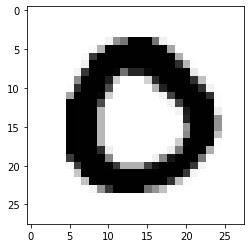

In [6]:
import matplotlib.pyplot as plt

num = 4

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")


### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [7]:
df_train["label"].value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

No: tenemos más 1 que 5, pero tampoco está tan desbalanceado

### Conjunto de development

In [8]:
import csv
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Creo una clase
class attributes: 
    def __init__(self, number, neighbours, percentage, acc, prec, rec): 
        self.number = number
        self.neighbours = neighbours
        self.percentage = percentage
        self.acc = acc
        self.prec = prec
        self.rec = rec
   


def createObject(X_train, y_train,X_val, y_val,p,v,n,lista):
        
    
        clf = metnum.KNNClassifier(v)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
    
        acc = accuracy_score(y_val, y_pred)
        print("Accuracy: {}".format(acc))
        prec = precision_score(y_val, y_pred, average='macro')
        print("Precision: {}".format(prec))
        rec = recall_score(y_val, y_pred, average='macro')
        print("Recall: {}".format(rec))
        lista.append(attributes(n,v,p,acc,prec,rec))
        


def experiment(per_b, per_i, nei_b, nei_i):
    print("Comenzando...")
    list = []
    number = 0
    total = 0
    
    
    for v1 in range(per_b,100,per_i):
        for v2 in range(nei_b,100,nei_i):
            total += 1
    for v1 in range(per_b,100,per_i):
        print("Calculando PCA para "+str(v1)+"%")
        limit = int(v1/100 * X.shape[0])
        X_train, y_train = X[:limit], y[:limit]
        X_val, y_val = X[limit:], y[limit:]
        pca = metnum.PCA(40)
        pca.fit(X_train)  
        X_train = pca.transform(X_train)
        X_val = pca.transform(X_val)
        assert len(X_train) == len(y_train)
        assert len(X_val) == len(y_val)
        
        for v2 in range(nei_b,100,nei_i):
            print("Con " + str(v1) +"% y " + str(v2) + " vecinos")
            createObject(X_train, y_train,X_val, y_val,v1,v2,number,list)
            number += 1
            print("Iteracion " + str(number) + '/' + str(total) + "(" + str(number/total*100) + "%)")
            
    exportcsv(list,per_b, per_i, nei_b, nei_i)

  



def exportcsv(list,per_b, per_i, nei_b, nei_i):
    csv_file = str(per_b) + "-" + str(per_i) + "-" + str(nei_b) + "-" + str(nei_i) + ".csv"
    try:
        with open(csv_file, 'w') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(['Numero','Vecinos','Porcentaje','Accuracy','Precision','Recall'])
            for data in list:
                writer.writerow([data.number,data.neighbours,data.percentage,data.acc,data.prec,data.rec])
    except IOError:
        print("I/O error")
  


In [9]:
%%time
experiment(1,2,1,2)

Comenzando...
Calculando PCA para 1%
Con 1% y 1 vecinos
Accuracy: 0.8106301106301106
Precision: 0.8128816921917468
Recall: 0.8067755917464783
Iteracion 1/2500(0.04%)
Con 1% y 3 vecinos
Accuracy: 0.7984848484848485
Precision: 0.8032642817007337
Recall: 0.793894812283884
Iteracion 2/2500(0.08%)
Con 1% y 5 vecinos
Accuracy: 0.7963684463684464
Precision: 0.7997497416348367
Recall: 0.7916262116339438
Iteracion 3/2500(0.12%)
Con 1% y 7 vecinos
Accuracy: 0.7892255892255893
Precision: 0.7953000866606043
Recall: 0.7841814382566218
Iteracion 4/2500(0.16%)
Con 1% y 9 vecinos
Accuracy: 0.7818181818181819
Precision: 0.7898442507553859
Recall: 0.7763296536034633
Iteracion 5/2500(0.2%)
Con 1% y 11 vecinos
Accuracy: 0.774074074074074
Precision: 0.7836242117126806
Recall: 0.7682129666320934
Iteracion 6/2500(0.24%)
Con 1% y 13 vecinos
Accuracy: 0.7651996151996152
Precision: 0.7768767402387193
Recall: 0.7589992990900527
Iteracion 7/2500(0.27999999999999997%)
Con 1% y 15 vecinos
Accuracy: 0.75690235690235

Accuracy: 0.8388316151202749
Precision: 0.8408757654916762
Recall: 0.8357604438626545
Iteracion 62/2500(2.48%)
Con 3% y 25 vecinos
Accuracy: 0.8346097201767305
Precision: 0.8370973777167761
Recall: 0.8314347236126164
Iteracion 63/2500(2.52%)
Con 3% y 27 vecinos
Accuracy: 0.8312223858615612
Precision: 0.8340086054137332
Recall: 0.8279483209641437
Iteracion 64/2500(2.56%)
Con 3% y 29 vecinos
Accuracy: 0.8281050564555719
Precision: 0.8311566158698506
Recall: 0.8247407726441957
Iteracion 65/2500(2.6%)
Con 3% y 31 vecinos
Accuracy: 0.8234413352970054
Precision: 0.8267061155090593
Recall: 0.8199040659794191
Iteracion 66/2500(2.64%)
Con 3% y 33 vecinos
Accuracy: 0.8206431026018655
Precision: 0.8242822129114904
Recall: 0.8169462309430905
Iteracion 67/2500(2.68%)
Con 3% y 35 vecinos
Accuracy: 0.8164948453608247
Precision: 0.820447000652029
Recall: 0.8126792574359343
Iteracion 68/2500(2.7199999999999998%)
Con 3% y 37 vecinos
Accuracy: 0.8138193421698576
Precision: 0.8180961784703433
Recall: 0.80

Accuracy: 0.8470175438596491
Precision: 0.8534645440353952
Recall: 0.8443162860561836
Iteracion 123/2500(4.92%)
Con 5% y 47 vecinos
Accuracy: 0.844812030075188
Precision: 0.8513408136143891
Recall: 0.842011631391298
Iteracion 124/2500(4.96%)
Con 5% y 49 vecinos
Accuracy: 0.8427568922305765
Precision: 0.8497974943931105
Recall: 0.8399074568396567
Iteracion 125/2500(5.0%)
Con 5% y 51 vecinos
Accuracy: 0.8405012531328321
Precision: 0.8478567391381177
Recall: 0.8376059597179886
Iteracion 126/2500(5.04%)
Con 5% y 53 vecinos
Accuracy: 0.8381453634085213
Precision: 0.8459401971343471
Recall: 0.8351509892190926
Iteracion 127/2500(5.08%)
Con 5% y 55 vecinos
Accuracy: 0.8359147869674185
Precision: 0.8442411930208082
Recall: 0.8328436531854064
Iteracion 128/2500(5.12%)
Con 5% y 57 vecinos
Accuracy: 0.8345864661654135
Precision: 0.8433943805189003
Recall: 0.8314526623384397
Iteracion 129/2500(5.16%)
Con 5% y 59 vecinos
Accuracy: 0.8327568922305765
Precision: 0.8419398343843326
Recall: 0.8295418995

Accuracy: 0.8370199692780338
Precision: 0.8395258275985775
Recall: 0.8350027801710033
Iteracion 184/2500(7.359999999999999%)
Con 7% y 69 vecinos
Accuracy: 0.8357654889912954
Precision: 0.8383520437532457
Recall: 0.8337215740414624
Iteracion 185/2500(7.3999999999999995%)
Con 7% y 71 vecinos
Accuracy: 0.8345366103430619
Precision: 0.837202692131967
Recall: 0.8324570007822343
Iteracion 186/2500(7.4399999999999995%)
Con 7% y 73 vecinos
Accuracy: 0.8325652841781874
Precision: 0.8352181630092211
Recall: 0.8304558408998266
Iteracion 187/2500(7.48%)
Con 7% y 75 vecinos
Accuracy: 0.8308243727598567
Precision: 0.8335031035255345
Recall: 0.8286581623612062
Iteracion 188/2500(7.5200000000000005%)
Con 7% y 77 vecinos
Accuracy: 0.8300819252432156
Precision: 0.8328376045496808
Recall: 0.827901354865993
Iteracion 189/2500(7.5600000000000005%)
Con 7% y 79 vecinos
Accuracy: 0.8290066564260112
Precision: 0.8318552457882387
Recall: 0.8267606774813162
Iteracion 190/2500(7.6%)
Con 7% y 81 vecinos
Accuracy: 

Accuracy: 0.8456305599162742
Precision: 0.847935923182561
Recall: 0.8427726895842202
Iteracion 245/2500(9.8%)
Con 9% y 91 vecinos
Accuracy: 0.844348508634223
Precision: 0.8467406999078724
Recall: 0.8414637899149694
Iteracion 246/2500(9.84%)
Con 9% y 93 vecinos
Accuracy: 0.843301936159079
Precision: 0.845722767115919
Recall: 0.8403565595107703
Iteracion 247/2500(9.879999999999999%)
Con 9% y 95 vecinos
Accuracy: 0.8422815279958137
Precision: 0.8446933336811725
Recall: 0.8392737647265808
Iteracion 248/2500(9.92%)
Con 9% y 97 vecinos
Accuracy: 0.8411302982731554
Precision: 0.8437018286702642
Recall: 0.838064619451784
Iteracion 249/2500(9.959999999999999%)
Con 9% y 99 vecinos
Accuracy: 0.8398482469911042
Precision: 0.8424367977963654
Recall: 0.8367240900202315
Iteracion 250/2500(10.0%)
Calculando PCA para 11%
Con 11% y 1 vecinos
Accuracy: 0.9139914392723382
Precision: 0.9133164671757854
Recall: 0.9134042621613736
Iteracion 251/2500(10.040000000000001%)
Con 11% y 3 vecinos
Accuracy: 0.917950

Accuracy: 0.9235905856595512
Precision: 0.9231814705789251
Recall: 0.9230663902388667
Iteracion 305/2500(12.2%)
Con 13% y 11 vecinos
Accuracy: 0.9220306513409962
Precision: 0.9216907616566855
Recall: 0.921512919920563
Iteracion 306/2500(12.24%)
Con 13% y 13 vecinos
Accuracy: 0.9204980842911877
Precision: 0.9202428437405228
Recall: 0.9200119683151355
Iteracion 307/2500(12.280000000000001%)
Con 13% y 15 vecinos
Accuracy: 0.9178708264915162
Precision: 0.917680811002481
Recall: 0.9173694738333138
Iteracion 308/2500(12.32%)
Con 13% y 17 vecinos
Accuracy: 0.9162287903667214
Precision: 0.916056864854067
Recall: 0.9156700718436284
Iteracion 309/2500(12.36%)
Con 13% y 19 vecinos
Accuracy: 0.9142583470169677
Precision: 0.9140823502128761
Recall: 0.9136831571027859
Iteracion 310/2500(12.4%)
Con 13% y 21 vecinos
Accuracy: 0.9128626163108922
Precision: 0.9127806193008643
Recall: 0.9122636700768982
Iteracion 311/2500(12.44%)
Con 13% y 23 vecinos
Accuracy: 0.9117405582922824
Precision: 0.911681259821

Accuracy: 0.9092997198879552
Precision: 0.9099598489816092
Recall: 0.9082551599546086
Iteracion 365/2500(14.6%)
Con 15% y 31 vecinos
Accuracy: 0.9076470588235294
Precision: 0.908469573931054
Recall: 0.9065765220420113
Iteracion 366/2500(14.64%)
Con 15% y 33 vecinos
Accuracy: 0.9067507002801121
Precision: 0.9075820579062117
Recall: 0.9056717237556914
Iteracion 367/2500(14.680000000000001%)
Con 15% y 35 vecinos
Accuracy: 0.9055462184873949
Precision: 0.9064069595273813
Recall: 0.9044147067881502
Iteracion 368/2500(14.719999999999999%)
Con 15% y 37 vecinos
Accuracy: 0.9048459383753501
Precision: 0.9057989605537632
Recall: 0.9036914515393907
Iteracion 369/2500(14.760000000000002%)
Con 15% y 39 vecinos
Accuracy: 0.9030252100840336
Precision: 0.9039983940356358
Recall: 0.9018284802098778
Iteracion 370/2500(14.799999999999999%)
Con 15% y 41 vecinos
Accuracy: 0.9017366946778711
Precision: 0.9028205505975316
Recall: 0.900519952096484
Iteracion 371/2500(14.84%)
Con 15% y 43 vecinos
Accuracy: 0.9

Accuracy: 0.893689041881813
Precision: 0.8953649386209289
Recall: 0.8925716982749421
Iteracion 425/2500(17.0%)
Con 17% y 51 vecinos
Accuracy: 0.8930866322432588
Precision: 0.8947853691858201
Recall: 0.8919565172630728
Iteracion 426/2500(17.04%)
Con 17% y 53 vecinos
Accuracy: 0.8913367756741251
Precision: 0.8930880375049085
Recall: 0.8901543527920474
Iteracion 427/2500(17.080000000000002%)
Con 17% y 55 vecinos
Accuracy: 0.8901893287435456
Precision: 0.8920117573163578
Recall: 0.8889800103509259
Iteracion 428/2500(17.119999999999997%)
Con 17% y 57 vecinos
Accuracy: 0.8895869191049914
Precision: 0.8913798977899088
Recall: 0.8883853815616725
Iteracion 429/2500(17.16%)
Con 17% y 59 vecinos
Accuracy: 0.8877510040160642
Precision: 0.889580213253182
Recall: 0.886517353291759
Iteracion 430/2500(17.2%)
Con 17% y 61 vecinos
Accuracy: 0.8864888123924268
Precision: 0.8884488018154008
Recall: 0.885199178738058
Iteracion 431/2500(17.24%)
Con 17% y 63 vecinos
Accuracy: 0.8848537005163511
Precision: 0.

Accuracy: 0.8751322751322751
Precision: 0.8763317341381276
Recall: 0.8734958468044578
Iteracion 486/2500(19.439999999999998%)
Con 19% y 73 vecinos
Accuracy: 0.8741916519694297
Precision: 0.8753908232131234
Recall: 0.8725251965461233
Iteracion 487/2500(19.48%)
Con 19% y 75 vecinos
Accuracy: 0.8729864785420341
Precision: 0.8742346226110846
Recall: 0.8712840737412941
Iteracion 488/2500(19.52%)
Con 19% y 77 vecinos
Accuracy: 0.8717813051146385
Precision: 0.873042410934268
Recall: 0.8700700930540173
Iteracion 489/2500(19.56%)
Con 19% y 79 vecinos
Accuracy: 0.8710464432686655
Precision: 0.8723099734742409
Recall: 0.869314010629554
Iteracion 490/2500(19.6%)
Con 19% y 81 vecinos
Accuracy: 0.8703703703703703
Precision: 0.8717516768924007
Recall: 0.8686164025271909
Iteracion 491/2500(19.64%)
Con 19% y 83 vecinos
Accuracy: 0.8696061140505585
Precision: 0.8709785566205881
Recall: 0.8678496804848519
Iteracion 492/2500(19.68%)
Con 19% y 85 vecinos
Accuracy: 0.8684891240446796
Precision: 0.8699083998

Accuracy: 0.882368896925859
Precision: 0.8839917529967758
Recall: 0.8809849342165841
Iteracion 546/2500(21.84%)
Con 21% y 93 vecinos
Accuracy: 0.8813441832429174
Precision: 0.8830307349394614
Recall: 0.879955032153793
Iteracion 547/2500(21.88%)
Con 21% y 95 vecinos
Accuracy: 0.8803797468354431
Precision: 0.8821613178711637
Recall: 0.878989814754066
Iteracion 548/2500(21.92%)
Con 21% y 97 vecinos
Accuracy: 0.8795660036166365
Precision: 0.8813212563908299
Recall: 0.8781782734846907
Iteracion 549/2500(21.959999999999997%)
Con 21% y 99 vecinos
Accuracy: 0.878963230861965
Precision: 0.8808676651807572
Recall: 0.8775492839533483
Iteracion 550/2500(22.0%)
Calculando PCA para 23%
Con 23% y 1 vecinos
Accuracy: 0.9344465058750773
Precision: 0.9338550321653522
Recall: 0.9338648941743235
Iteracion 551/2500(22.040000000000003%)
Con 23% y 3 vecinos
Accuracy: 0.9366728509585652
Precision: 0.9361550997901743
Recall: 0.9360823711335884
Iteracion 552/2500(22.08%)
Con 23% y 5 vecinos
Accuracy: 0.93651824

Accuracy: 0.9320952380952381
Precision: 0.9320012385756431
Recall: 0.9314777901319937
Iteracion 606/2500(24.240000000000002%)
Con 25% y 13 vecinos
Accuracy: 0.9294285714285714
Precision: 0.9294661005523184
Recall: 0.9288035012491301
Iteracion 607/2500(24.279999999999998%)
Con 25% y 15 vecinos
Accuracy: 0.9284126984126985
Precision: 0.9284270114281101
Recall: 0.9277816206293211
Iteracion 608/2500(24.32%)
Con 25% y 17 vecinos
Accuracy: 0.9265396825396826
Precision: 0.9266335537970608
Recall: 0.9258856387508526
Iteracion 609/2500(24.36%)
Con 25% y 19 vecinos
Accuracy: 0.9245396825396826
Precision: 0.9246766449017914
Recall: 0.9238177916465586
Iteracion 610/2500(24.4%)
Con 25% y 21 vecinos
Accuracy: 0.9226666666666666
Precision: 0.922870432362469
Recall: 0.9219440990654736
Iteracion 611/2500(24.44%)
Con 25% y 23 vecinos
Accuracy: 0.9207301587301587
Precision: 0.9209468692962457
Recall: 0.9199723428184428
Iteracion 612/2500(24.48%)
Con 25% y 25 vecinos
Accuracy: 0.9193968253968254
Precision

Accuracy: 0.9143835616438356
Precision: 0.9143679756049737
Recall: 0.9135662385323322
Iteracion 666/2500(26.640000000000004%)
Con 27% y 33 vecinos
Accuracy: 0.9127527723418134
Precision: 0.9127231377923701
Recall: 0.911946632277519
Iteracion 667/2500(26.68%)
Con 27% y 35 vecinos
Accuracy: 0.91102413568167
Precision: 0.9110359320496485
Recall: 0.910192793709254
Iteracion 668/2500(26.72%)
Con 27% y 37 vecinos
Accuracy: 0.9091650358773646
Precision: 0.9091960807775944
Recall: 0.9083048089484338
Iteracion 669/2500(26.76%)
Con 27% y 39 vecinos
Accuracy: 0.908382257012394
Precision: 0.9084639600012052
Recall: 0.9074565361401126
Iteracion 670/2500(26.8%)
Con 27% y 41 vecinos
Accuracy: 0.9078604044357469
Precision: 0.9079737826245277
Recall: 0.9069636025245795
Iteracion 671/2500(26.840000000000003%)
Con 27% y 43 vecinos
Accuracy: 0.9064579256360078
Precision: 0.9066116126026265
Recall: 0.9055164660095528
Iteracion 672/2500(26.88%)
Con 27% y 45 vecinos
Accuracy: 0.9045335942596217
Precision: 0.

Accuracy: 0.9124748490945674
Precision: 0.912846572899992
Recall: 0.9114698361171183
Iteracion 726/2500(29.04%)
Con 29% y 53 vecinos
Accuracy: 0.9124413145539906
Precision: 0.9128520126120048
Recall: 0.9114397258210729
Iteracion 727/2500(29.080000000000002%)
Con 29% y 55 vecinos
Accuracy: 0.9114017437961099
Precision: 0.9118338196580844
Recall: 0.9103514707657776
Iteracion 728/2500(29.12%)
Con 29% y 57 vecinos
Accuracy: 0.9105298457411134
Precision: 0.911017656476953
Recall: 0.9094686225867861
Iteracion 729/2500(29.160000000000004%)
Con 29% y 59 vecinos
Accuracy: 0.9097585513078471
Precision: 0.9102439131387682
Recall: 0.9086817949920206
Iteracion 730/2500(29.2%)
Con 29% y 61 vecinos
Accuracy: 0.9089201877934272
Precision: 0.9095134254762545
Recall: 0.9078331482769793
Iteracion 731/2500(29.24%)
Con 29% y 63 vecinos
Accuracy: 0.9086183769282361
Precision: 0.9092154943268367
Recall: 0.9075159449901429
Iteracion 732/2500(29.28%)
Con 29% y 65 vecinos
Accuracy: 0.9077129443326627
Precision:

Accuracy: 0.9037267080745341
Precision: 0.9043751437866275
Recall: 0.9026093825703676
Iteracion 785/2500(31.4%)
Con 31% y 71 vecinos
Accuracy: 0.9026570048309178
Precision: 0.9033641345034373
Recall: 0.9015174069060186
Iteracion 786/2500(31.44%)
Con 31% y 73 vecinos
Accuracy: 0.9020358868184956
Precision: 0.9027358810214388
Recall: 0.9008865273630169
Iteracion 787/2500(31.480000000000004%)
Con 31% y 75 vecinos
Accuracy: 0.9014492753623189
Precision: 0.9021798777719893
Recall: 0.9002881677800325
Iteracion 788/2500(31.52%)
Con 31% y 77 vecinos
Accuracy: 0.9011387163561076
Precision: 0.901849950408814
Recall: 0.8999453924550943
Iteracion 789/2500(31.56%)
Con 31% y 79 vecinos
Accuracy: 0.900448585231194
Precision: 0.9011358142311471
Recall: 0.8992844482353431
Iteracion 790/2500(31.6%)
Con 31% y 81 vecinos
Accuracy: 0.8995859213250518
Precision: 0.900327107899518
Recall: 0.8983920353892451
Iteracion 791/2500(31.64%)
Con 31% y 83 vecinos
Accuracy: 0.8996894409937888
Precision: 0.900492901716

Accuracy: 0.9034115138592751
Precision: 0.9044765656474049
Recall: 0.9026089482268276
Iteracion 845/2500(33.800000000000004%)
Con 33% y 91 vecinos
Accuracy: 0.9029850746268657
Precision: 0.9041327431506285
Recall: 0.9021625255763908
Iteracion 846/2500(33.839999999999996%)
Con 33% y 93 vecinos
Accuracy: 0.9018834399431415
Precision: 0.9030815826853559
Recall: 0.9010359836392059
Iteracion 847/2500(33.879999999999995%)
Con 33% y 95 vecinos
Accuracy: 0.9015991471215352
Precision: 0.9027937048685472
Recall: 0.9007389307153982
Iteracion 848/2500(33.92%)
Con 33% y 97 vecinos
Accuracy: 0.9011016346837243
Precision: 0.9023344198495418
Recall: 0.9002197655170796
Iteracion 849/2500(33.96%)
Con 33% y 99 vecinos
Accuracy: 0.900497512437811
Precision: 0.9016663084172928
Recall: 0.8996236294348854
Iteracion 850/2500(34.0%)
Calculando PCA para 35%
Con 35% y 1 vecinos
Accuracy: 0.9450569576205999
Precision: 0.9445904932331299
Recall: 0.9445295858888068
Iteracion 851/2500(34.04%)
Con 35% y 3 vecinos
Acc

Accuracy: 0.9461451247165533
Precision: 0.9460008784444389
Recall: 0.9457011956465751
Iteracion 905/2500(36.199999999999996%)
Con 37% y 11 vecinos
Accuracy: 0.9447089947089947
Precision: 0.9445712758789611
Recall: 0.9442672817979455
Iteracion 906/2500(36.24%)
Con 37% y 13 vecinos
Accuracy: 0.9431594860166289
Precision: 0.943085835650348
Recall: 0.9427096751751718
Iteracion 907/2500(36.28%)
Con 37% y 15 vecinos
Accuracy: 0.9412698412698413
Precision: 0.9411782161672002
Recall: 0.9408185133235497
Iteracion 908/2500(36.32%)
Con 37% y 17 vecinos
Accuracy: 0.9402116402116402
Precision: 0.9401027274860094
Recall: 0.9397309715399983
Iteracion 909/2500(36.36%)
Con 37% y 19 vecinos
Accuracy: 0.9396069538926681
Precision: 0.9396420519863036
Recall: 0.9391008447022058
Iteracion 910/2500(36.4%)
Con 37% y 21 vecinos
Accuracy: 0.9379440665154951
Precision: 0.9380359013829513
Recall: 0.9374280314774787
Iteracion 911/2500(36.44%)
Con 37% y 23 vecinos
Accuracy: 0.9375661375661376
Precision: 0.937673769

Accuracy: 0.9318891491022638
Precision: 0.9317016294385455
Recall: 0.9313054423615845
Iteracion 966/2500(38.64%)
Con 39% y 33 vecinos
Accuracy: 0.9302107728337237
Precision: 0.9300419502700953
Recall: 0.9295619310329639
Iteracion 967/2500(38.68%)
Con 39% y 35 vecinos
Accuracy: 0.9292349726775956
Precision: 0.9291522400046416
Recall: 0.9285509997009257
Iteracion 968/2500(38.72%)
Con 39% y 37 vecinos
Accuracy: 0.9286494925839188
Precision: 0.9286104892813356
Recall: 0.9279577497273991
Iteracion 969/2500(38.76%)
Con 39% y 39 vecinos
Accuracy: 0.9272443403590944
Precision: 0.9271773421475522
Recall: 0.9264900428041182
Iteracion 970/2500(38.800000000000004%)
Con 39% y 41 vecinos
Accuracy: 0.9266978922716628
Precision: 0.926640889312492
Recall: 0.925939797353512
Iteracion 971/2500(38.84%)
Con 39% y 43 vecinos
Accuracy: 0.9254488680718189
Precision: 0.9253850049797506
Recall: 0.924733488842033
Iteracion 972/2500(38.879999999999995%)
Con 39% y 45 vecinos
Accuracy: 0.9246291959406714
Precision:

Accuracy: 0.9223970944309927
Precision: 0.9226655341410532
Recall: 0.9215959749692451
Iteracion 1026/2500(41.04%)
Con 41% y 53 vecinos
Accuracy: 0.9217110573042776
Precision: 0.9219897914195061
Recall: 0.9208813683973196
Iteracion 1027/2500(41.08%)
Con 41% y 55 vecinos
Accuracy: 0.9213075060532687
Precision: 0.9216484954115751
Recall: 0.9204657351514628
Iteracion 1028/2500(41.120000000000005%)
Con 41% y 57 vecinos
Accuracy: 0.9199757869249394
Precision: 0.9204128267376369
Recall: 0.9191210722667054
Iteracion 1029/2500(41.160000000000004%)
Con 41% y 59 vecinos
Accuracy: 0.9194511702986279
Precision: 0.9199190853201573
Recall: 0.9185515696077214
Iteracion 1030/2500(41.199999999999996%)
Con 41% y 61 vecinos
Accuracy: 0.918724778046812
Precision: 0.9192168414994472
Recall: 0.917830509633492
Iteracion 1031/2500(41.24%)
Con 41% y 63 vecinos
Accuracy: 0.9179983857949959
Precision: 0.9185174944994369
Recall: 0.9170919335099912
Iteracion 1032/2500(41.28%)
Con 41% y 65 vecinos
Accuracy: 0.917675

Accuracy: 0.9174603174603174
Precision: 0.9183417603633186
Recall: 0.9165394454093688
Iteracion 1086/2500(43.44%)
Con 43% y 73 vecinos
Accuracy: 0.9169590643274854
Precision: 0.9178903615894033
Recall: 0.9160088374414139
Iteracion 1087/2500(43.480000000000004%)
Con 43% y 75 vecinos
Accuracy: 0.916624895572264
Precision: 0.9175877119920688
Recall: 0.9156899272465953
Iteracion 1088/2500(43.519999999999996%)
Con 43% y 77 vecinos
Accuracy: 0.9160401002506265
Precision: 0.91706458587783
Recall: 0.9151015691543893
Iteracion 1089/2500(43.56%)
Con 43% y 79 vecinos
Accuracy: 0.9154970760233918
Precision: 0.9165118984478928
Recall: 0.9145272520336747
Iteracion 1090/2500(43.6%)
Con 43% y 81 vecinos
Accuracy: 0.914703425229741
Precision: 0.9157881408092967
Recall: 0.9137275147042268
Iteracion 1091/2500(43.64%)
Con 43% y 83 vecinos
Accuracy: 0.9149540517961571
Precision: 0.91606116110359
Recall: 0.9139816302269999
Iteracion 1092/2500(43.68%)
Con 43% y 85 vecinos
Accuracy: 0.9141186299081036
Precisi

Accuracy: 0.9049350649350649
Precision: 0.9057196675530891
Recall: 0.9038283747543272
Iteracion 1146/2500(45.839999999999996%)
Con 45% y 93 vecinos
Accuracy: 0.9042424242424243
Precision: 0.9050483708129674
Recall: 0.9031363581177457
Iteracion 1147/2500(45.879999999999995%)
Con 45% y 95 vecinos
Accuracy: 0.9038095238095238
Precision: 0.9046221461199044
Recall: 0.9026821166019005
Iteracion 1148/2500(45.92%)
Con 45% y 97 vecinos
Accuracy: 0.9034199134199135
Precision: 0.9042206980109038
Recall: 0.9022777037112372
Iteracion 1149/2500(45.96%)
Con 45% y 99 vecinos
Accuracy: 0.9026839826839826
Precision: 0.9034640605679541
Recall: 0.901498643568373
Iteracion 1150/2500(46.0%)
Calculando PCA para 47%
Con 47% y 1 vecinos
Accuracy: 0.9448337825696316
Precision: 0.9444701978661806
Recall: 0.9443424262410742
Iteracion 1151/2500(46.04%)
Con 47% y 3 vecinos
Accuracy: 0.9468104222821204
Precision: 0.9463905224935873
Recall: 0.9463929258697718
Iteracion 1152/2500(46.08%)
Con 47% y 5 vecinos
Accuracy: 

Accuracy: 0.9419701213818861
Precision: 0.9418918792704577
Recall: 0.9414860238227961
Iteracion 1206/2500(48.24%)
Con 49% y 13 vecinos
Accuracy: 0.9408029878618114
Precision: 0.9408210285800669
Recall: 0.9403121230629639
Iteracion 1207/2500(48.28%)
Con 49% y 15 vecinos
Accuracy: 0.9391690009337068
Precision: 0.9391943967551135
Recall: 0.9386742695622488
Iteracion 1208/2500(48.32%)
Con 49% y 17 vecinos
Accuracy: 0.938328664799253
Precision: 0.9383486286465322
Recall: 0.9377989282214931
Iteracion 1209/2500(48.36%)
Con 49% y 19 vecinos
Accuracy: 0.9370681605975724
Precision: 0.9371897050127066
Recall: 0.9365619104786156
Iteracion 1210/2500(48.4%)
Con 49% y 21 vecinos
Accuracy: 0.9369281045751634
Precision: 0.9370834262781849
Recall: 0.9364394118671584
Iteracion 1211/2500(48.44%)
Con 49% y 23 vecinos
Accuracy: 0.9353874883286648
Precision: 0.9355821486776741
Recall: 0.9348882147854944
Iteracion 1212/2500(48.480000000000004%)
Con 49% y 25 vecinos
Accuracy: 0.9334733893557423
Precision: 0.93

Accuracy: 0.9306608357628766
Precision: 0.9305682448817316
Recall: 0.9302707007722363
Iteracion 1266/2500(50.63999999999999%)
Con 51% y 33 vecinos
Accuracy: 0.9297862001943634
Precision: 0.9297384050320214
Recall: 0.9293911737120887
Iteracion 1267/2500(50.68%)
Con 51% y 35 vecinos
Accuracy: 0.9293488824101069
Precision: 0.9293850126849413
Recall: 0.9289168047691433
Iteracion 1268/2500(50.72%)
Con 51% y 37 vecinos
Accuracy: 0.9282312925170068
Precision: 0.9282724533629277
Recall: 0.9277899033361624
Iteracion 1269/2500(50.760000000000005%)
Con 51% y 39 vecinos
Accuracy: 0.9274538386783284
Precision: 0.9275086119214053
Recall: 0.927001046614512
Iteracion 1270/2500(50.8%)
Con 51% y 41 vecinos
Accuracy: 0.9256559766763849
Precision: 0.9257291314546163
Recall: 0.9252146145586371
Iteracion 1271/2500(50.839999999999996%)
Con 51% y 43 vecinos
Accuracy: 0.9254616132167153
Precision: 0.925571328921488
Recall: 0.9250111626395603
Iteracion 1272/2500(50.88%)
Con 51% y 45 vecinos
Accuracy: 0.92487852

Accuracy: 0.9253292806484296
Precision: 0.9257672167373325
Recall: 0.9244024084599408
Iteracion 1325/2500(53.0%)
Con 53% y 51 vecinos
Accuracy: 0.9247213779128672
Precision: 0.9251794291157482
Recall: 0.923780263284171
Iteracion 1326/2500(53.04%)
Con 53% y 53 vecinos
Accuracy: 0.9240628166160081
Precision: 0.9245148557105093
Recall: 0.9231276195347344
Iteracion 1327/2500(53.080000000000005%)
Con 53% y 55 vecinos
Accuracy: 0.9237082066869301
Precision: 0.924286413682411
Recall: 0.9227547840386403
Iteracion 1328/2500(53.12%)
Con 53% y 57 vecinos
Accuracy: 0.9227456940222898
Precision: 0.9233914950750413
Recall: 0.9217709616671229
Iteracion 1329/2500(53.16%)
Con 53% y 59 vecinos
Accuracy: 0.922289766970618
Precision: 0.9229414791656119
Recall: 0.9213139745534551
Iteracion 1330/2500(53.2%)
Con 53% y 61 vecinos
Accuracy: 0.921580547112462
Precision: 0.9222257795903218
Recall: 0.9206057085475855
Iteracion 1331/2500(53.239999999999995%)
Con 53% y 63 vecinos
Accuracy: 0.9202634245187437
Precis

Accuracy: 0.9243386243386243
Precision: 0.9248373751737887
Recall: 0.9235075950857301
Iteracion 1384/2500(55.36%)
Con 55% y 69 vecinos
Accuracy: 0.9233862433862434
Precision: 0.9239078312471172
Recall: 0.922530526636943
Iteracion 1385/2500(55.400000000000006%)
Con 55% y 71 vecinos
Accuracy: 0.9229100529100529
Precision: 0.9235310211861627
Recall: 0.9220600479721774
Iteracion 1386/2500(55.44%)
Con 55% y 73 vecinos
Accuracy: 0.9226455026455026
Precision: 0.9233006351090791
Recall: 0.9217860664217887
Iteracion 1387/2500(55.48%)
Con 55% y 75 vecinos
Accuracy: 0.921957671957672
Precision: 0.9226383285193102
Recall: 0.9211144256469075
Iteracion 1388/2500(55.52%)
Con 55% y 77 vecinos
Accuracy: 0.9214285714285714
Precision: 0.9221510470789485
Recall: 0.9205472296451702
Iteracion 1389/2500(55.559999999999995%)
Con 55% y 79 vecinos
Accuracy: 0.9206349206349206
Precision: 0.9213431517331967
Recall: 0.9197145637176352
Iteracion 1390/2500(55.60000000000001%)
Con 55% y 81 vecinos
Accuracy: 0.9197883

Accuracy: 0.9166712806599856
Precision: 0.917080181569745
Recall: 0.9159876133940699
Iteracion 1443/2500(57.720000000000006%)
Con 57% y 87 vecinos
Accuracy: 0.9163390731410221
Precision: 0.9167686330349498
Recall: 0.9156373038283933
Iteracion 1444/2500(57.76%)
Con 57% y 89 vecinos
Accuracy: 0.9156192901832678
Precision: 0.9160582892970067
Recall: 0.9149496148615246
Iteracion 1445/2500(57.8%)
Con 57% y 91 vecinos
Accuracy: 0.9155085543436133
Precision: 0.9159441235316523
Recall: 0.9148205978277995
Iteracion 1446/2500(57.84%)
Con 57% y 93 vecinos
Accuracy: 0.9151763468246498
Precision: 0.9156276527771295
Recall: 0.9144688099919224
Iteracion 1447/2500(57.879999999999995%)
Con 57% y 95 vecinos
Accuracy: 0.9144565638668956
Precision: 0.914939529190806
Recall: 0.9137370187621816
Iteracion 1448/2500(57.92%)
Con 57% y 97 vecinos
Accuracy: 0.913902884668623
Precision: 0.9143809897528211
Recall: 0.9131689884550764
Iteracion 1449/2500(57.96%)
Con 57% y 99 vecinos
Accuracy: 0.9130723658712142
Prec

Accuracy: 0.9562881562881563
Precision: 0.956080615042113
Recall: 0.9558058254520269
Iteracion 1502/2500(60.08%)
Con 61% y 5 vecinos
Accuracy: 0.9541514041514042
Precision: 0.953918750675089
Recall: 0.953647671752919
Iteracion 1503/2500(60.12%)
Con 61% y 7 vecinos
Accuracy: 0.953052503052503
Precision: 0.9528584137040472
Recall: 0.952537622677907
Iteracion 1504/2500(60.160000000000004%)
Con 61% y 9 vecinos
Accuracy: 0.9524420024420024
Precision: 0.9522737594130601
Recall: 0.9519382728814229
Iteracion 1505/2500(60.199999999999996%)
Con 61% y 11 vecinos
Accuracy: 0.9518315018315018
Precision: 0.9517315828680084
Recall: 0.9513612093368315
Iteracion 1506/2500(60.24%)
Con 61% y 13 vecinos
Accuracy: 0.9503663003663003
Precision: 0.9503640705528085
Recall: 0.949848482281722
Iteracion 1507/2500(60.28%)
Con 61% y 15 vecinos
Accuracy: 0.9492673992673992
Precision: 0.9492765321381809
Recall: 0.9487470860989466
Iteracion 1508/2500(60.31999999999999%)
Con 61% y 17 vecinos
Accuracy: 0.94713064713064

Accuracy: 0.9414414414414415
Precision: 0.9418866962333391
Recall: 0.9406498193372252
Iteracion 1561/2500(62.44%)
Con 63% y 23 vecinos
Accuracy: 0.9396396396396396
Precision: 0.9400652174647398
Recall: 0.9388637129601006
Iteracion 1562/2500(62.480000000000004%)
Con 63% y 25 vecinos
Accuracy: 0.9396396396396396
Precision: 0.9401618890660035
Recall: 0.9388399669476712
Iteracion 1563/2500(62.519999999999996%)
Con 63% y 27 vecinos
Accuracy: 0.9388674388674388
Precision: 0.9394895965627912
Recall: 0.9380500073949858
Iteracion 1564/2500(62.56%)
Con 63% y 29 vecinos
Accuracy: 0.9375804375804376
Precision: 0.938169168715121
Recall: 0.9367684222659106
Iteracion 1565/2500(62.6%)
Con 63% y 31 vecinos
Accuracy: 0.9361003861003862
Precision: 0.9368264885932248
Recall: 0.9352704070452781
Iteracion 1566/2500(62.63999999999999%)
Con 63% y 33 vecinos
Accuracy: 0.9351994851994851
Precision: 0.9359322367255437
Recall: 0.9343294574036797
Iteracion 1567/2500(62.68%)
Con 63% y 35 vecinos
Accuracy: 0.9344916

Accuracy: 0.9312925170068027
Precision: 0.9320410472064313
Recall: 0.9302480623261677
Iteracion 1620/2500(64.8%)
Con 65% y 41 vecinos
Accuracy: 0.9299319727891157
Precision: 0.9305881895049574
Recall: 0.9288522637044526
Iteracion 1621/2500(64.84%)
Con 65% y 43 vecinos
Accuracy: 0.929795918367347
Precision: 0.9305044055694054
Recall: 0.928735584016159
Iteracion 1622/2500(64.88000000000001%)
Con 65% y 45 vecinos
Accuracy: 0.9296598639455782
Precision: 0.930532770775843
Recall: 0.9285930929582532
Iteracion 1623/2500(64.92%)
Con 65% y 47 vecinos
Accuracy: 0.9287755102040817
Precision: 0.9295974958050657
Recall: 0.9276750411398764
Iteracion 1624/2500(64.96%)
Con 65% y 49 vecinos
Accuracy: 0.9283673469387755
Precision: 0.929166828243703
Recall: 0.9272539423324823
Iteracion 1625/2500(65.0%)
Con 65% y 51 vecinos
Accuracy: 0.9280272108843537
Precision: 0.9288509815232263
Recall: 0.9269112960858623
Iteracion 1626/2500(65.03999999999999%)
Con 65% y 53 vecinos
Accuracy: 0.9270068027210885
Precisio

Accuracy: 0.9281385281385282
Precision: 0.9287854793188476
Recall: 0.9271017006511235
Iteracion 1680/2500(67.2%)
Con 67% y 61 vecinos
Accuracy: 0.9275613275613276
Precision: 0.9281937971340761
Recall: 0.9265346060560065
Iteracion 1681/2500(67.24%)
Con 67% y 63 vecinos
Accuracy: 0.9277056277056277
Precision: 0.9284840099176497
Recall: 0.9266480450074255
Iteracion 1682/2500(67.28%)
Con 67% y 65 vecinos
Accuracy: 0.9278499278499278
Precision: 0.9285691921967556
Recall: 0.9267888892093209
Iteracion 1683/2500(67.32000000000001%)
Con 67% y 67 vecinos
Accuracy: 0.9272727272727272
Precision: 0.9280421671213265
Recall: 0.9261835504811058
Iteracion 1684/2500(67.36%)
Con 67% y 69 vecinos
Accuracy: 0.926046176046176
Precision: 0.9267751183530297
Recall: 0.924952456275624
Iteracion 1685/2500(67.4%)
Con 67% y 71 vecinos
Accuracy: 0.9257575757575758
Precision: 0.9265001914840786
Recall: 0.924644364776252
Iteracion 1686/2500(67.44%)
Con 67% y 73 vecinos
Accuracy: 0.9251082251082251
Precision: 0.925825

Accuracy: 0.9275785269948544
Precision: 0.9282012729592163
Recall: 0.9266741350965295
Iteracion 1740/2500(69.6%)
Con 69% y 81 vecinos
Accuracy: 0.9263497427232932
Precision: 0.9270353701908878
Recall: 0.9254077354066605
Iteracion 1741/2500(69.64%)
Con 69% y 83 vecinos
Accuracy: 0.9259657476384302
Precision: 0.9266421342240181
Recall: 0.9250301695379293
Iteracion 1742/2500(69.67999999999999%)
Con 69% y 85 vecinos
Accuracy: 0.9256585515705399
Precision: 0.9263251310111673
Recall: 0.9247285040883388
Iteracion 1743/2500(69.72%)
Con 69% y 87 vecinos
Accuracy: 0.9248137623838415
Precision: 0.9255534414298958
Recall: 0.9238562454386896
Iteracion 1744/2500(69.76%)
Con 69% y 89 vecinos
Accuracy: 0.9241993702480609
Precision: 0.924966912789501
Recall: 0.9232351392605306
Iteracion 1745/2500(69.8%)
Con 69% y 91 vecinos
Accuracy: 0.9232777820443898
Precision: 0.924069024069581
Recall: 0.9222998348367032
Iteracion 1746/2500(69.84%)
Con 69% y 93 vecinos
Accuracy: 0.922509791874664
Precision: 0.923394

Accuracy: 0.9207717569786535
Precision: 0.9216157606409613
Recall: 0.919701435126178
Iteracion 1800/2500(72.0%)
Calculando PCA para 73%
Con 73% y 1 vecinos
Accuracy: 0.9535273368606701
Precision: 0.9530183915393922
Recall: 0.9530192645369823
Iteracion 1801/2500(72.04%)
Con 73% y 3 vecinos
Accuracy: 0.9572310405643739
Precision: 0.9568595056854994
Recall: 0.956769096715313
Iteracion 1802/2500(72.08%)
Con 73% y 5 vecinos
Accuracy: 0.9559964726631394
Precision: 0.9556369557445639
Recall: 0.9554263951918154
Iteracion 1803/2500(72.11999999999999%)
Con 73% y 7 vecinos
Accuracy: 0.9552028218694886
Precision: 0.9548235709720234
Recall: 0.9546815132206685
Iteracion 1804/2500(72.16%)
Con 73% y 9 vecinos
Accuracy: 0.9544091710758378
Precision: 0.9541530582435993
Recall: 0.9539648257493291
Iteracion 1805/2500(72.2%)
Con 73% y 11 vecinos
Accuracy: 0.950352733686067
Precision: 0.9500717294429591
Recall: 0.9499145581060985
Iteracion 1806/2500(72.24000000000001%)
Con 73% y 13 vecinos
Accuracy: 0.94876

Accuracy: 0.9485714285714286
Precision: 0.9486799096336019
Recall: 0.947924857109261
Iteracion 1860/2500(74.4%)
Con 75% y 21 vecinos
Accuracy: 0.947047619047619
Precision: 0.947088193623712
Recall: 0.9463337881815749
Iteracion 1861/2500(74.44%)
Con 75% y 23 vecinos
Accuracy: 0.9467619047619048
Precision: 0.9467584927620887
Recall: 0.9460555910692611
Iteracion 1862/2500(74.48%)
Con 75% y 25 vecinos
Accuracy: 0.9451428571428572
Precision: 0.9450651887440008
Recall: 0.9444083223346494
Iteracion 1863/2500(74.52%)
Con 75% y 27 vecinos
Accuracy: 0.9446666666666667
Precision: 0.9446429918532482
Recall: 0.9439047107436827
Iteracion 1864/2500(74.56%)
Con 75% y 29 vecinos
Accuracy: 0.9431428571428572
Precision: 0.9431094601125907
Recall: 0.942370172548828
Iteracion 1865/2500(74.6%)
Con 75% y 31 vecinos
Accuracy: 0.9431428571428572
Precision: 0.9431074128255938
Recall: 0.9424080479229733
Iteracion 1866/2500(74.64%)
Con 75% y 33 vecinos
Accuracy: 0.9425714285714286
Precision: 0.9425831488840384
Re

Accuracy: 0.9387163561076605
Precision: 0.9386996289505072
Recall: 0.9379508869333701
Iteracion 1921/2500(76.84%)
Con 77% y 43 vecinos
Accuracy: 0.9374741200828157
Precision: 0.9375085380260236
Recall: 0.9366310407909145
Iteracion 1922/2500(76.88000000000001%)
Con 77% y 45 vecinos
Accuracy: 0.9368530020703933
Precision: 0.9368847488465077
Recall: 0.9359746247945873
Iteracion 1923/2500(76.92%)
Con 77% y 47 vecinos
Accuracy: 0.9364389233954451
Precision: 0.9364311469132242
Recall: 0.9355184217395344
Iteracion 1924/2500(76.96%)
Con 77% y 49 vecinos
Accuracy: 0.9360248447204969
Precision: 0.9360205361201658
Recall: 0.9351394214111639
Iteracion 1925/2500(77.0%)
Con 77% y 51 vecinos
Accuracy: 0.9356107660455486
Precision: 0.935713182652081
Recall: 0.9347292267874112
Iteracion 1926/2500(77.03999999999999%)
Con 77% y 53 vecinos
Accuracy: 0.9346790890269151
Precision: 0.9348046568230138
Recall: 0.9337724344039756
Iteracion 1927/2500(77.08%)
Con 77% y 55 vecinos
Accuracy: 0.9334368530020704
Prec

Accuracy: 0.9346938775510204
Precision: 0.9349367003527256
Recall: 0.9337014626462246
Iteracion 1981/2500(79.24%)
Con 79% y 63 vecinos
Accuracy: 0.9340136054421768
Precision: 0.9342829000236674
Recall: 0.9329913194212225
Iteracion 1982/2500(79.28%)
Con 79% y 65 vecinos
Accuracy: 0.9336734693877551
Precision: 0.9339856753521987
Recall: 0.9326540318190348
Iteracion 1983/2500(79.32000000000001%)
Con 79% y 67 vecinos
Accuracy: 0.9328798185941043
Precision: 0.933204123988622
Recall: 0.931827973612441
Iteracion 1984/2500(79.36%)
Con 79% y 69 vecinos
Accuracy: 0.9326530612244898
Precision: 0.932895145667198
Recall: 0.9315951982864078
Iteracion 1985/2500(79.4%)
Con 79% y 71 vecinos
Accuracy: 0.9324263038548752
Precision: 0.932761268177573
Recall: 0.9313579539270778
Iteracion 1986/2500(79.44%)
Con 79% y 73 vecinos
Accuracy: 0.9312925170068027
Precision: 0.9315631602096801
Recall: 0.9302302881556044
Iteracion 1987/2500(79.47999999999999%)
Con 79% y 75 vecinos
Accuracy: 0.9316326530612244
Precisi

Accuracy: 0.9329573934837093
Precision: 0.9338975623185825
Recall: 0.9317831084832248
Iteracion 2041/2500(81.64%)
Con 81% y 83 vecinos
Accuracy: 0.9315789473684211
Precision: 0.932446749348754
Recall: 0.9304438964475187
Iteracion 2042/2500(81.67999999999999%)
Con 81% y 85 vecinos
Accuracy: 0.931203007518797
Precision: 0.932019991642713
Recall: 0.9300314349854011
Iteracion 2043/2500(81.72%)
Con 81% y 87 vecinos
Accuracy: 0.9300751879699248
Precision: 0.9308821380387183
Recall: 0.9289039608657635
Iteracion 2044/2500(81.76%)
Con 81% y 89 vecinos
Accuracy: 0.9299498746867167
Precision: 0.9308235938233194
Recall: 0.9287970115244615
Iteracion 2045/2500(81.8%)
Con 81% y 91 vecinos
Accuracy: 0.9296992481203008
Precision: 0.9306134466426863
Recall: 0.9285642341389302
Iteracion 2046/2500(81.84%)
Con 81% y 93 vecinos
Accuracy: 0.9294486215538847
Precision: 0.9303410751535726
Recall: 0.9282897305599331
Iteracion 2047/2500(81.88%)
Con 81% y 95 vecinos
Accuracy: 0.9290726817042606
Precision: 0.93001

Con 85% y 1 vecinos
Accuracy: 0.9542857142857143
Precision: 0.9537761596136047
Recall: 0.9535975535457485
Iteracion 2101/2500(84.04%)
Con 85% y 3 vecinos
Accuracy: 0.9577777777777777
Precision: 0.9574323398721016
Recall: 0.9570381701772573
Iteracion 2102/2500(84.08%)
Con 85% y 5 vecinos
Accuracy: 0.956031746031746
Precision: 0.9554850937083181
Recall: 0.9553675239483714
Iteracion 2103/2500(84.11999999999999%)
Con 85% y 7 vecinos
Accuracy: 0.9557142857142857
Precision: 0.9553238974920703
Recall: 0.9550851143729174
Iteracion 2104/2500(84.16%)
Con 85% y 9 vecinos
Accuracy: 0.9531746031746032
Precision: 0.9528340927365502
Recall: 0.9524779883718825
Iteracion 2105/2500(84.2%)
Con 85% y 11 vecinos
Accuracy: 0.9512698412698413
Precision: 0.9511947636959732
Recall: 0.950584794102434
Iteracion 2106/2500(84.24000000000001%)
Con 85% y 13 vecinos
Accuracy: 0.9512698412698413
Precision: 0.95122756492315
Recall: 0.9505203180515759
Iteracion 2107/2500(84.28%)
Con 85% y 15 vecinos
Accuracy: 0.95031746

Accuracy: 0.9467032967032967
Precision: 0.9467200891748165
Recall: 0.9461179806939626
Iteracion 2161/2500(86.44%)
Con 87% y 23 vecinos
Accuracy: 0.9457875457875458
Precision: 0.9459594414159896
Recall: 0.9451383417493162
Iteracion 2162/2500(86.48%)
Con 87% y 25 vecinos
Accuracy: 0.9448717948717948
Precision: 0.945006087334618
Recall: 0.9441866220456268
Iteracion 2163/2500(86.52%)
Con 87% y 27 vecinos
Accuracy: 0.9434065934065934
Precision: 0.9433555407826744
Recall: 0.9426539998764906
Iteracion 2164/2500(86.56%)
Con 87% y 29 vecinos
Accuracy: 0.9439560439560439
Precision: 0.9438760060540826
Recall: 0.9431763291842238
Iteracion 2165/2500(86.6%)
Con 87% y 31 vecinos
Accuracy: 0.9432234432234432
Precision: 0.9432623743283663
Recall: 0.9424698787283685
Iteracion 2166/2500(86.64%)
Con 87% y 33 vecinos
Accuracy: 0.9421245421245421
Precision: 0.9422373278374389
Recall: 0.9413415612512372
Iteracion 2167/2500(86.68%)
Con 87% y 35 vecinos
Accuracy: 0.9408424908424908
Precision: 0.941049210006442

Accuracy: 0.9393939393939394
Precision: 0.9393699620274513
Recall: 0.9388052032816049
Iteracion 2221/2500(88.84%)
Con 89% y 43 vecinos
Accuracy: 0.9396103896103896
Precision: 0.9397304736187223
Recall: 0.939100563634154
Iteracion 2222/2500(88.88000000000001%)
Con 89% y 45 vecinos
Accuracy: 0.9387445887445888
Precision: 0.9388755528134063
Recall: 0.9383253521756142
Iteracion 2223/2500(88.92%)
Con 89% y 47 vecinos
Accuracy: 0.9365800865800866
Precision: 0.9367482418294528
Recall: 0.9361732657356114
Iteracion 2224/2500(88.96%)
Con 89% y 49 vecinos
Accuracy: 0.9365800865800866
Precision: 0.9367546682073312
Recall: 0.9361220105420628
Iteracion 2225/2500(89.0%)
Con 89% y 51 vecinos
Accuracy: 0.9357142857142857
Precision: 0.9359145968814191
Recall: 0.935148849561904
Iteracion 2226/2500(89.03999999999999%)
Con 89% y 53 vecinos
Accuracy: 0.9357142857142857
Precision: 0.9358729996576832
Recall: 0.9351824299658779
Iteracion 2227/2500(89.08%)
Con 89% y 55 vecinos
Accuracy: 0.933982683982684
Precis

Accuracy: 0.9341269841269841
Precision: 0.934813573301591
Recall: 0.9326692673517615
Iteracion 2281/2500(91.24%)
Con 91% y 63 vecinos
Accuracy: 0.9341269841269841
Precision: 0.9349292869722692
Recall: 0.9326840078427283
Iteracion 2282/2500(91.28%)
Con 91% y 65 vecinos
Accuracy: 0.9333333333333333
Precision: 0.9341791404898198
Recall: 0.9319257856580221
Iteracion 2283/2500(91.32000000000001%)
Con 91% y 67 vecinos
Accuracy: 0.9325396825396826
Precision: 0.933425342400108
Recall: 0.9312288642136034
Iteracion 2284/2500(91.36%)
Con 91% y 69 vecinos
Accuracy: 0.9328042328042329
Precision: 0.9335861826445953
Recall: 0.9314699063667069
Iteracion 2285/2500(91.4%)
Con 91% y 71 vecinos
Accuracy: 0.932010582010582
Precision: 0.9328194131671262
Recall: 0.9306500198271339
Iteracion 2286/2500(91.44%)
Con 91% y 73 vecinos
Accuracy: 0.9312169312169312
Precision: 0.9318897456716646
Recall: 0.9297701793788207
Iteracion 2287/2500(91.47999999999999%)
Con 91% y 75 vecinos
Accuracy: 0.9306878306878307
Precis

Accuracy: 0.9319727891156463
Precision: 0.9318001479506739
Recall: 0.929682142118164
Iteracion 2341/2500(93.64%)
Con 93% y 83 vecinos
Accuracy: 0.9319727891156463
Precision: 0.9318542235884115
Recall: 0.9297161214493569
Iteracion 2342/2500(93.67999999999999%)
Con 93% y 85 vecinos
Accuracy: 0.932312925170068
Precision: 0.9320794736805341
Recall: 0.9299940004085128
Iteracion 2343/2500(93.72%)
Con 93% y 87 vecinos
Accuracy: 0.9312925170068027
Precision: 0.9309840993807846
Recall: 0.9290184362036286
Iteracion 2344/2500(93.76%)
Con 93% y 89 vecinos
Accuracy: 0.9312925170068027
Precision: 0.9310789801669002
Recall: 0.929005986063777
Iteracion 2345/2500(93.8%)
Con 93% y 91 vecinos
Accuracy: 0.930952380952381
Precision: 0.9306748867613208
Recall: 0.9286464179116992
Iteracion 2346/2500(93.84%)
Con 93% y 93 vecinos
Accuracy: 0.9292517006802721
Precision: 0.9290021221191243
Recall: 0.9269394683857065
Iteracion 2347/2500(93.88%)
Con 93% y 95 vecinos
Accuracy: 0.9285714285714286
Precision: 0.928453

Accuracy: 0.9595238095238096
Precision: 0.9599349126933218
Recall: 0.9568751429010277
Iteracion 2402/2500(96.08%)
Con 97% y 5 vecinos
Accuracy: 0.9674603174603175
Precision: 0.9681602720003104
Recall: 0.9661727683818304
Iteracion 2403/2500(96.12%)
Con 97% y 7 vecinos
Accuracy: 0.9666666666666667
Precision: 0.9670392300207296
Recall: 0.9647944395127647
Iteracion 2404/2500(96.16%)
Con 97% y 9 vecinos
Accuracy: 0.9626984126984127
Precision: 0.9626837400666407
Recall: 0.9606189788290921
Iteracion 2405/2500(96.2%)
Con 97% y 11 vecinos
Accuracy: 0.9619047619047619
Precision: 0.9620908271073196
Recall: 0.9597014497916045
Iteracion 2406/2500(96.24000000000001%)
Con 97% y 13 vecinos
Accuracy: 0.9611111111111111
Precision: 0.9611921812435925
Recall: 0.9586646440915615
Iteracion 2407/2500(96.28%)
Con 97% y 15 vecinos
Accuracy: 0.9595238095238096
Precision: 0.9596691215204973
Recall: 0.9572679367498612
Iteracion 2408/2500(96.32%)
Con 97% y 17 vecinos
Accuracy: 0.9611111111111111
Precision: 0.96131

Accuracy: 0.9523809523809523
Precision: 0.9514718159412844
Recall: 0.9512490355592345
Iteracion 2462/2500(98.48%)
Con 99% y 25 vecinos
Accuracy: 0.9571428571428572
Precision: 0.9561327106021791
Recall: 0.9563326906428895
Iteracion 2463/2500(98.52%)
Con 99% y 27 vecinos
Accuracy: 0.9571428571428572
Precision: 0.9561327106021791
Recall: 0.9563326906428895
Iteracion 2464/2500(98.56%)
Con 99% y 29 vecinos
Accuracy: 0.9523809523809523
Precision: 0.9522400462471415
Recall: 0.9515891716136562
Iteracion 2465/2500(98.6%)
Con 99% y 31 vecinos
Accuracy: 0.9523809523809523
Precision: 0.9522400462471415
Recall: 0.9515891716136562
Iteracion 2466/2500(98.64%)
Con 99% y 33 vecinos
Accuracy: 0.95
Precision: 0.949857139596109
Recall: 0.9488864689109535
Iteracion 2467/2500(98.68%)
Con 99% y 35 vecinos
Accuracy: 0.95
Precision: 0.949857139596109
Recall: 0.9488864689109535
Iteracion 2468/2500(98.72%)
Con 99% y 37 vecinos
Accuracy: 0.95
Precision: 0.949857139596109
Recall: 0.9488864689109535
Iteracion 2469/